In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
userComb = pd.read_csv("user_info_comb.csv")

127476 users

In [ ]:
#userComb.set_index('id',inplace = True)

In [3]:
userComb.drop(['password','id.1','primary_address_id','lat', 'lng','formatted_address'], axis=1, inplace=True)
userComb.head()

,last_login,is_superuser,id,username,email,first_name,last_name,gender,tier,img,...,dob,email_verified,points,img_activity,street_line1,street_line2,zipcode,city,state,country
0,2017-01-27 17:42:31.857178+00,t,1,migueldv90,miguel@penpalschools.com,Miguel,Vazquez,M,4,user_app/1/08_07_2015_18_26_46_736474_upload-i...,...,1990-09-09 05:00:00+00,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Austin,TX,United States
1,2014-12-31 03:52:34.318484+00,f,2,Zhuf,zhuf@sfusd.edu,Fengsheng,Zhu,NaN,2,default-profile.svg,...,2015-03-20 03:20:34.472988+00,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,SF,CA,United States
2,2014-12-31 15:14:49.786013+00,f,3,oxheywood,mikki.caplan@gmail.com,Mikki,Caplan,NaN,2,default-profile.svg,...,2015-03-20 03:20:34.472988+00,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Watford,England,United Kingdom
3,2015-05-24 01:09:33+00,f,4,mimobrow,NaN,Michael,Monroe,NaN,1,default-profile.svg,...,2015-03-20 03:20:34+00,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Austin,TX,United States
4,2017-01-07 15:51:51.854495+00,f,5,joetroyen,joe@penpalschools.com,Joe,Troyen,NaN,4,user_app/5/04_01_2015_17_59_50_754213_upload-i...,...,2015-03-20 03:20:34+00,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Austin,TX,United States


In [134]:
userComb.columns.values

array(['last_login', 'is_superuser', 'id', 'username', 'email',
       'first_name', 'last_name', 'gender', 'tier', 'img', 'bio',
       'stripe_id', 'is_staff', 'is_active', 'date_joined', 'dob',
       'email_verified', 'points', 'img_activity', 'street_line1',
       'street_line2', 'zipcode', 'city', 'state', 'country',
       'formatted_address'], dtype=object)

In [4]:
userComb.describe(include=['O'])

,last_login,is_superuser,username,email,first_name,last_name,gender,img,bio,stripe_id,...,date_joined,dob,email_verified,img_activity,street_line1,street_line2,zipcode,city,state,country
count,127476,127476,127476,52645,97654,95666,93454,127472,15649,57,...,127476,127476,127476,127476,585,5,3971,24930,25637,127468
unique,127470,2,127476,50732,27800,3446,2,23029,15153,57,...,127464,95895,2,39788,433,1,2355,6691,1846,308
top,2015-11-20 20:09:12.20031+00,f,ZohraSailan,porurpenpal@gmail.com,Emily,M,F,default-profile.svg,Teacher,cus_9vQ7UHfUes3Cu9,...,2015-10-07 15:09:50.107519+00,2015-03-20 03:20:34.472988+00,f,2016-09-09 04:17:40.075083+00,New York,,48118,Austin,TX,None
freq,2,127474,1,81,457,7363,48932,75451,73,1,...,2,9243,122412,87652,21,5,62,482,1195,100363


### last_login

Change data to datetime format.

In [4]:
def strToDate(df,i=0):
    l = len(df)
    for dt in range(i,l):
        df[dt] = datetime.strptime(df[dt][0:10],"%Y-%m-%d").date()
    return df

In [5]:
lLDate = userComb["last_login"]
lLDate = strToDate(lLDate)

In [6]:
userComb["last_login"]=lLDate
userComb.head()

,last_login,is_superuser,id,username,email,first_name,last_name,gender,tier,img,...,dob,email_verified,points,img_activity,street_line1,street_line2,zipcode,city,state,country
0,2017-01-27,t,1,migueldv90,miguel@penpalschools.com,Miguel,Vazquez,M,4,user_app/1/08_07_2015_18_26_46_736474_upload-i...,...,1990-09-09 05:00:00+00,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Austin,TX,United States
1,2014-12-31,f,2,Zhuf,zhuf@sfusd.edu,Fengsheng,Zhu,NaN,2,default-profile.svg,...,2015-03-20 03:20:34.472988+00,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,SF,CA,United States
2,2014-12-31,f,3,oxheywood,mikki.caplan@gmail.com,Mikki,Caplan,NaN,2,default-profile.svg,...,2015-03-20 03:20:34.472988+00,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Watford,England,United Kingdom
3,2015-05-24,f,4,mimobrow,NaN,Michael,Monroe,NaN,1,default-profile.svg,...,2015-03-20 03:20:34+00,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Austin,TX,United States
4,2017-01-07,f,5,joetroyen,joe@penpalschools.com,Joe,Troyen,NaN,4,user_app/5/04_01_2015_17_59_50_754213_upload-i...,...,2015-03-20 03:20:34+00,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Austin,TX,United States


In [7]:
userComb.describe(include=['O'])

,last_login,is_superuser,username,email,first_name,last_name,gender,img,bio,stripe_id,...,date_joined,dob,email_verified,img_activity,street_line1,street_line2,zipcode,city,state,country
count,127476,127476,127476,52645,97654,95666,93454,127472,15649,57,...,127476,127476,127476,127476,585,5,3971,24930,25637,127468
unique,759,2,127476,50732,27800,3446,2,23029,15153,57,...,127464,95895,2,39788,433,1,2355,6691,1846,308
top,2017-01-26,f,cromerhai,porurpenpal@gmail.com,Emily,M,F,default-profile.svg,Teacher,cus_99XbW3VSpUbO8i,...,2016-02-29 16:58:03.3599+00,2015-03-20 03:20:34.472988+00,f,2016-09-09 04:17:40.075083+00,New York,,48118,Austin,TX,None
freq,2323,127474,1,81,457,7363,48932,75451,73,1,...,2,9243,122412,87652,21,5,62,482,1195,100363


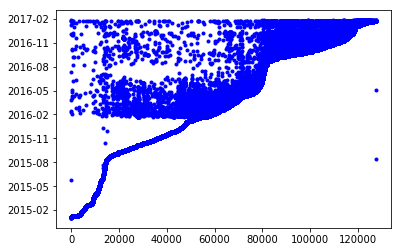

In [14]:
plt.plot(userComb.last_login,'b.')
plt.show()

Most of data are behind 2016-01.

### img_activity
img_activity also need be changed to date.

In [8]:
imgAct = userComb['img_activity']
imgAct.isnull().sum().sum()

0

In [9]:
imgAct=strToDate(imgAct)

In [10]:
userComb.groupby('img_activity')['id'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,img_activity,count
0,2016-09-09,88748
17,2016-09-26,1121
12,2016-09-21,1063
4,2016-09-13,999
133,2017-01-20,936
132,2017-01-19,924
14,2016-09-23,899
6,2016-09-15,782
13,2016-09-22,774
136,2017-01-23,755


In [11]:
userComb[userComb.img_activity == userComb.last_login].count()

last_login        15467
is_superuser      15467
id                15467
username          15467
email              4863
first_name         7970
last_name          7873
gender             7662
tier              15467
img               15466
bio                 887
stripe_id            10
is_staff          15467
is_active         15467
date_joined       15467
dob               15467
email_verified    15467
points            15467
img_activity      15467
street_line1         36
street_line2          0
zipcode             774
city               3307
state              3539
country           15466
dtype: int64

There are 15467 users has their img changed at the same day they last_login. Let us see what happens for data_joined.

### date_joined

In [12]:
dateJoin = userComb['date_joined']
dateJoin.isnull().sum().sum()

0

In [13]:
dateJoin=strToDate(dateJoin)

In [14]:
userComb['date_joined']=dateJoin
userComb['date_joined'].head()

0    2015-01-12
1    2014-12-31
2    2014-12-31
3    2014-12-31
4    2014-12-31
Name: date_joined, dtype: object

In [160]:
userComb[userComb.date_joined == userComb.last_login].count()

last_login           83969
is_superuser         83969
id                   83969
username             83969
email                35652
first_name           55919
last_name            54163
gender               52831
tier                 83969
img                  83966
bio                  10623
stripe_id               11
is_staff             83969
is_active            83969
date_joined          83969
dob                  83969
email_verified       83969
points               83969
img_activity         83969
street_line1           540
street_line2             5
zipcode               3252
city                 21490
state                22099
country              83961
formatted_address    23503
dtype: int64

There are 83969 users the last login day is the same day as they join.

### dob

In [15]:
dateBirth = userComb['dob']
dateBirth.isnull().sum().sum()

0

In [16]:
dateBirth=strToDate(dateBirth)

In [17]:
timeNew = userComb
userComb.to_csv('userComb.csv')

### img

In [ ]:
userComb = pd.read_csv("userComb.csv")
#userComb=timeNew

In [ ]:
userComb.drop('Unnamed: 0',axis = 1,inplace=True)

In [18]:
userComb.img.describe(include=['O'])

count                  127472
unique                  23029
top       default-profile.svg
freq                    75451
Name: img, dtype: object

There are 4 people's img is nan. But I think they can be the same as default img, so, I let img_def = 0. And img=0.

In [19]:
userComb.groupby('img')['id'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

,img,count
3,default-profile.svg,75451
15,t-rex.png,7470
5,hadrosaurus.png,7164
14,stegosaurus.png,3837
2,brontosaurus.png,2705
7,minotaurasaurus.png,1628
8,pachycephalosaurus.png,1481
16,triceratops.png,1379
23028,velociraptor.png,1344
10,pterodaktyl.png,1062


How many user upload images (start with user_app)?

In [31]:
userComb["img_def"] = pd.Series( np.where(userComb.img == 'default-profile.svg' , 0 , 1 ))
userComb.img_def.fillna(0,inplace=True)
userComb[["img","img_def"]].head(10)

,img,img_def
0,1,1
1,default-profile.svg,0
2,default-profile.svg,0
3,default-profile.svg,0
4,1,1
5,default-profile.svg,0
6,default-profile.svg,0
7,default-profile.svg,0
8,default-profile.svg,0
9,default-profile.svg,0


In [32]:
userComb.img_def.describe()

count    127476.000000
mean          0.408116
std           0.491487
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: img_def, dtype: float64

In [22]:
imgUpload = userComb.img
for i in range(len(imgUpload)):
    if type(imgUpload[i])==type(" "):
        if imgUpload[i].startswith("user_app"):
            imgUpload[i]=1

In [33]:
imgUpload[imgUpload==1].count()

23010

In [34]:
imgUpload.describe()

count                  127476
unique                     21
top       default-profile.svg
freq                    75451
Name: img, dtype: object

In [25]:
#Solve it to csv, because it is so time consuming
imgUpload.to_csv('imgUpload.csv')

In [35]:
userComb.img = imgUpload
userComb.img.fillna(0,inplace = True)
userComb.img.describe()

count                  127476
unique                     21
top       default-profile.svg
freq                    75451
Name: img, dtype: object

In [41]:
userComb.img = pd.Series(np.where(userComb.img == 1, 0, 1))
userComb.rename(columns = {'img':'img_upload'},inplace=True)
userComb.groupby('img_upload')['id','username'].count()

,id,username
img_upload,,
0,104466,104466
1,23010,23010


In [42]:
userComb.head()

,last_login,is_superuser,id,username,email,first_name,last_name,gender,tier,img_upload,...,email_verified,points,img_activity,street_line1,street_line2,zipcode,city,state,country,img_def
0,2017-01-27,t,1,migueldv90,miguel@penpalschools.com,Miguel,Vazquez,M,4,1,...,f,0,2016-09-09,NaN,NaN,NaN,Austin,TX,United States,1
1,2014-12-31,f,2,Zhuf,zhuf@sfusd.edu,Fengsheng,Zhu,NaN,2,0,...,f,0,2016-09-09,NaN,NaN,NaN,SF,CA,United States,0
2,2014-12-31,f,3,oxheywood,mikki.caplan@gmail.com,Mikki,Caplan,NaN,2,0,...,f,0,2016-09-09,NaN,NaN,NaN,Watford,England,United Kingdom,0
3,2015-05-24,f,4,mimobrow,NaN,Michael,Monroe,NaN,1,0,...,f,0,2016-09-09,NaN,NaN,NaN,Austin,TX,United States,0
4,2017-01-07,f,5,joetroyen,joe@penpalschools.com,Joe,Troyen,NaN,4,1,...,f,0,2016-09-09,NaN,NaN,NaN,Austin,TX,United States,1


### is_superuser

In [43]:
userComb.is_superuser=userComb.is_superuser.map({'t':0,'f':1})
userComb.groupby('is_superuser')['id','username'].count()

,id,username
is_superuser,,
0,2,2
1,127474,127474


<p> Because there is only 2 super-user, they may be outliers. Let us see who are the two super-user</p>

In [40]:
userComb[userComb.is_superuser==0]

,last_login,is_superuser,id,username,email,first_name,last_name,gender,tier,img,...,email_verified,points,img_activity,street_line1,street_line2,zipcode,city,state,country,formatted_address
0,2017-01-27,0,1,migueldv90,miguel@penpalschools.com,Miguel,Vazquez,M,4,user_app/1/08_07_2015_18_26_46_736474_upload-i...,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Austin,TX,United States,"Austin, TX, USA"
24,2017-01-26,0,32,markdanforth,mark.danforth@bookaround.co,PenPal,Coach,NaN,4,default-profile.svg,...,t,0,2016-09-09 04:17:40+00,NaN,NaN,NaN,Austin,TX,United States,"Austin, TX, USA"


They are migueldv and markdanforth, who are the employees from Penpal Schools. They may just test the website functions. So I decide to delete the is_superuser colunm. I don't need to delete the 2 superusers, because I will delete later.

In [44]:
userComb.drop(['is_superuser'], axis=1, inplace=True)

### is_staff

In [3]:
userComb.is_staff.describe(include=['O'])

count     127476
unique         2
top            f
freq      127471
Name: is_staff, dtype: object

In [4]:
userComb.is_staff=userComb.is_staff.map({'t':0,'f':1})
userComb.groupby('is_staff')['id','username'].count()

,id,username
is_staff,,
0,5,5
1,127471,127471


<p style = "color:red"> Delete staff later.</p>

In [5]:
userComb.is_staff.to_csv('is_st.csv')

### is_active

In [50]:
userComb.is_active.describe(include=['O'])

count    127476.000000
mean          0.026044
std           0.159267
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_active, dtype: float64

In [49]:
userComb.is_active=userComb.is_active.map({'t':0,'f':1})
userComb.groupby('is_active')['id','username'].count()

,id,username
is_active,,
0,124156,124156
1,3320,3320


<p style = "color:red">Delete inactive users later.</p>

### username
<p> Every user name is unique. Nothing can be done with it.

### email
<p> It is wired that there are 52645 user have input their email but only 50732 unique values are found. And porurpenpal@gmail.com appears 81 times. Whoes email is porurpenpal@gmail.com?

In [18]:
userComb[userComb.email=="porurpenpal@gmail.com"]

,last_login,id,username,email,first_name,last_name,gender,tier,img,bio,...,email_verified,points,img_activity,street_line1,street_line2,zipcode,city,state,country,formatted_address
54598,2016-01-21,56997,ajaydevanand,porurpenpal@gmail.com,Ajay,A,M,1,default-profile.svg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
54651,2016-02-03,57050,annamalai,porurpenpal@gmail.com,annamalai,s,M,1,user_app/57050/E6V5a9Vijay1.jpg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
54671,2016-01-21,57070,deepakprasad,porurpenpal@gmail.com,deepak,m,M,1,default-profile.svg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
54683,2016-01-21,57082,deva,porurpenpal@gmail.com,deva,s,M,1,default-profile.svg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
54703,2016-01-21,57102,dhanushc,porurpenpal@gmail.com,dhanush,c,M,1,default-profile.svg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
54712,2016-01-21,57111,dhanushm,porurpenpal@gmail.com,dhanush,m,M,1,default-profile.svg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
54726,2016-01-21,57125,elamaran,porurpenpal@gmail.com,elamaran,p,M,1,default-profile.svg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
54730,2016-01-21,57129,gunasekark,porurpenpal@gmail.com,gunasekar,k,M,1,default-profile.svg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
54741,2016-01-21,57140,harishporur,porurpenpal@gmail.com,harish,g,M,1,default-profile.svg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
54747,2016-01-21,57146,harishv,porurpenpal@gmail.com,harish,v,M,1,default-profile.svg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN


All the last names are one single letter, same gender, same tier, most of them use deful image, and last login are around Jan/Feb 2016. So those data is fake data, it should be deleted. <p style = "color:red">Delete those later.</p>

In [51]:
userComb.email.fillna(0,inplace=True)
userComb['no_email'] = pd.Series(np.where(userComb.email == 0, 0, 1))

In [52]:
userComb.head()

,last_login,id,username,email,first_name,last_name,gender,tier,img_upload,bio,...,points,img_activity,street_line1,street_line2,zipcode,city,state,country,img_def,no_email
0,2017-01-27,1,migueldv90,miguel@penpalschools.com,Miguel,Vazquez,M,4,1,"Co-Founder and CTO at PenPal Schools, Miguel i...",...,0,2016-09-09,NaN,NaN,NaN,Austin,TX,United States,1,1
1,2014-12-31,2,Zhuf,zhuf@sfusd.edu,Fengsheng,Zhu,NaN,2,0,NaN,...,0,2016-09-09,NaN,NaN,NaN,SF,CA,United States,0,1
2,2014-12-31,3,oxheywood,mikki.caplan@gmail.com,Mikki,Caplan,NaN,2,0,NaN,...,0,2016-09-09,NaN,NaN,NaN,Watford,England,United Kingdom,0,1
3,2015-05-24,4,mimobrow,0,Michael,Monroe,NaN,1,0,NaN,...,0,2016-09-09,NaN,NaN,NaN,Austin,TX,United States,0,0
4,2017-01-07,5,joetroyen,joe@penpalschools.com,Joe,Troyen,NaN,4,1,Joe is the founder of PenPal Schools. He is p...,...,0,2016-09-09,NaN,NaN,NaN,Austin,TX,United States,1,1


In [53]:
userComb.groupby('email')['id'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(25)

,email,count
0,0,74831
40097,porurpenpal@gmail.com,81
7606,abhi.gladiator210@gmail.com,64
39628,penpalmugappair@gmail.com,53
23412,hemapenpal2016@gmail.com,41
21548,garland.a@rochesterschools.com,39
39629,penpalmugappir@gmail.com,34
33564,manish.sharma@aif.org,27
43811,sarah.hodgkinson@risd.org,26
39594,pelusocl@yahoo.com,26


<p> Same thing happens with "abhi.gladiator210@gmail.com" and "penpalmugappair@gmail.com"<p>

In [22]:
userComb[userComb.email=="hemapenpal2016@gmail.com"]

,last_login,id,username,email,first_name,last_name,gender,tier,img,bio,...,email_verified,points,img_activity,street_line1,street_line2,zipcode,city,state,country,formatted_address
27705,2016-02-15,29867,BHARATH.K,hemapenpal2016@gmail.com,Bharath,K,M,1,user_app/29867/11_03_2015_10_42_09_moWwWKHARAT...,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Chennai,TN,India,"Chennai, Tamil Nadu, India"
27706,2016-02-06,29868,GOKULRAJ.S,hemapenpal2016@gmail.com,gokulraj,S,M,1,user_app/29868/11_03_2015_10_43_04_EtErxCUL_RA...,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
27707,2016-02-08,29869,MANIKANDAN.M,hemapenpal2016@gmail.com,Manikandan,M,F,1,user_app/29869/11_03_2015_10_48_07_mYypNbKANDA...,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
27708,2016-02-06,29870,NAVEENKUMAR.A,hemapenpal2016@gmail.com,Naveen Kumar,A,M,1,user_app/29870/11_03_2015_10_49_27_zHAEFS_KUMA...,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
27709,2016-02-06,29871,PUGAZHENTHI.I,hemapenpal2016@gmail.com,pugazhenthi,I,M,1,default-profile.svg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
27712,2016-02-06,29874,SANJAY.M,hemapenpal2016@gmail.com,sanjay,M,M,1,user_app/29874/11_06_2015_08_59_24_k5DgIsSANJA...,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
27715,2016-02-08,29877,THAMEEMANSARI.K,hemapenpal2016@gmail.com,thameemansari,K,M,1,user_app/29877/11_06_2015_09_02_47_CUN88sANSAR...,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
27717,2016-02-08,29879,ARCHANA.I,hemapenpal2016@gmail.com,archana,I,F,1,user_app/29879/11_06_2015_09_10_21_YF2Tf3RCHAN...,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
27719,2016-02-08,29881,BELCIYAMARY.A,hemapenpal2016@gmail.com,Belciyamary,A,F,1,default-profile.svg,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN
27721,2016-02-06,29883,GUNAVATHY.M,hemapenpal2016@gmail.com,gunavathy,M,F,1,user_app/29883/11_06_2015_09_10_36_BANP3DA_MAR...,NaN,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,NaN,NaN,None,NaN


<p> Things are different here. Even though they share the same email, they have more likely address and names.

### email_verified

In [54]:
userComb.email_verified.describe(include=['O'])

count     127476
unique         2
top            f
freq      122412
Name: email_verified, dtype: object

In [55]:
userComb.groupby('email_verified')['id','username'].count()

,id,username
email_verified,,
f,122412,122412
t,5064,5064


In [56]:
userComb.email_verified=userComb.email_verified.map({'t':0,'f':1})
userComb.groupby('email_verified')['id'].count()

email_verified
0      5064
1    122412
Name: id, dtype: int64

### gender

In [57]:
userComb.gender.fillna(0,inplace=True)
userComb.gender=userComb.gender.map({'M':1,'F':2,0:0})
userComb.groupby('gender')['id','username'].count()

,id,username
gender,,
0,34022,34022
1,44522,44522
2,48932,48932


<p>34022 people didn't input their gender.</p>
<p>0: NaN, 1: Male, 2: Famale </p>

### tier

In [58]:
userComb.groupby('tier')['id','username'].count()

,id,username
tier,,
1,116264,116264
2,11207,11207
4,5,5


In [25]:
userComb[userComb.tier==4]

,last_login,id,username,email,first_name,last_name,gender,tier,img,bio,...,email_verified,points,img_activity,street_line1,street_line2,zipcode,city,state,country,formatted_address
0,2017-01-27,1,migueldv90,miguel@penpalschools.com,Miguel,Vazquez,1,4,user_app/1/08_07_2015_18_26_46_736474_upload-i...,"Co-Founder and CTO at PenPal Schools, Miguel i...",...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Austin,TX,United States,"Austin, TX, USA"
4,2017-01-07,5,joetroyen,joe@penpalschools.com,Joe,Troyen,0,4,user_app/5/04_01_2015_17_59_50_754213_upload-i...,Joe is the founder of PenPal Schools. He is p...,...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Austin,TX,United States,"Austin, TX, USA"
24,2017-01-26,32,markdanforth,mark.danforth@bookaround.co,PenPal,Coach,0,4,default-profile.svg,NaN,...,t,0,2016-09-09 04:17:40+00,NaN,NaN,NaN,Austin,TX,United States,"Austin, TX, USA"
19808,2017-01-09,21949,CrystalG,crystalgermond@gmail.com,Crystal,NaN,2,4,user_app/21949/09_10_2015_18_53_10_968546_uplo...,"I work for PenPal Schools, love trying new foo...",...,f,0,2016-09-09 04:17:40.075083+00,NaN,NaN,NaN,Austin,TX,United States,"Austin, TX, USA"
100930,2016-12-16,104036,josephyu28,joseph@penpalschools.com,Joseph,Yu,1,4,default-profile.svg,NaN,...,t,0,2016-09-30 13:45:20+00,NaN,NaN,NaN,State College,PA,United States,"State College, PA, USA"


<p style="color:red"> delete later</p>

### stripe_id

In [59]:
userComb.stripe_id.describe(include=['O'])

count                     57
unique                    57
top       cus_99XbW3VSpUbO8i
freq                       1
Name: stripe_id, dtype: object

Because every value is unique, so I just say if it has stripe_id is 0, otherwise is 1.

In [60]:
userComb.stripe_id.fillna(0,inplace=True)
userComb.stripe_id = pd.Series(np.where(userComb.stripe_id == 0, 0, 1))

In [61]:
userComb.rename(columns = {'stripe_id':'stripe'},inplace=True)

In [62]:
userComb.groupby('stripe')['id','username'].count()

,id,username
stripe,,
0,127419,127419
1,57,57


### street_line1

In [64]:
userComb.street_line1.fillna(0,inplace=True)
userComb["street1"] = pd.Series(np.where(userComb.street_line1 == 0, 0, 1))

In [65]:
userComb.groupby('street1')['id','username'].count()

,id,username
street1,,
0,126891,126891
1,585,585


### street_line2

In [66]:
userComb.street_line2.fillna(0,inplace=True)
userComb["street2"] = pd.Series(np.where(userComb.street_line2 == 0, 0, 1))

In [67]:
userComb.groupby('street2')['id','username'].count()

,id,username
street2,,
0,127471,127471
1,5,5


### zipcode

In [80]:
userComb.zipcode.fillna(0,inplace=True)
#userComb["zipcode"] = pd.Series(np.where(userComb.zipcode == 0, 0, 1))

In [81]:
userComb.zipcode.describe()

count    127476.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: zipcode, dtype: float64

In [78]:
userComb.groupby('zipcode')['id'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

,zipcode,count


In [77]:
userComb.zipcode=userComb.zipcode.map({'USA':1})
userComb.head()

,last_login,id,username,email,first_name,last_name,gender,tier,img_upload,bio,...,street_line1,street_line2,zipcode,city,state,country,img_def,no_email,street1,street2
0,2017-01-27,1,migueldv90,miguel@penpalschools.com,Miguel,Vazquez,1,4,1,"Co-Founder and CTO at PenPal Schools, Miguel i...",...,0,0,NaN,Austin,TX,United States,1,1,0,0
1,2014-12-31,2,Zhuf,zhuf@sfusd.edu,Fengsheng,Zhu,0,2,0,NaN,...,0,0,NaN,SF,CA,United States,0,1,0,0
2,2014-12-31,3,oxheywood,mikki.caplan@gmail.com,Mikki,Caplan,0,2,0,NaN,...,0,0,NaN,Watford,England,United Kingdom,0,1,0,0
3,2015-05-24,4,mimobrow,0,Michael,Monroe,0,1,0,NaN,...,0,0,NaN,Austin,TX,United States,0,0,0,0
4,2017-01-07,5,joetroyen,joe@penpalschools.com,Joe,Troyen,0,4,1,Joe is the founder of PenPal Schools. He is p...,...,0,0,NaN,Austin,TX,United States,1,1,0,0


### city

In [82]:
userComb.city.fillna(0,inplace=True)

In [173]:
userComb.city.describe()

count     127476
unique      6692
top            0
freq      102546
Name: city, dtype: int64

### state

In [83]:
userComb.state.fillna(0,inplace=True)

### country

In [84]:
userComb.country.fillna(0,inplace=True)

In [ ]:
userComb.to_csv('userCombAddr.csv')

### bio

In [85]:
userComb.bio = userComb.bio.str.lower()
userComb.bio.fillna(0,inplace=True)
userComb.bio.describe()

count     127476
unique     15035
top            0
freq      111827
Name: bio, dtype: int64

In [87]:
userbio = userComb.bio
userbio.describe()

count     127476
unique     15035
top            0
freq      111827
Name: bio, dtype: int64

In [86]:
userComb.groupby('bio')['id'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(35)

,bio,count
0,0,111827
14318,teacher,86
2567,hi,40
1346,english teacher,24
375,5th grade teacher,19
301,4th grade teacher,19
505,:),13
1825,hello,12
14231,student,11
904,awesome,10


<h4>Strategy (all in lower case): </h4>
<p>0: nan + . + ... + :)</p>
<p>1: hi + hi!+ hello </p>
<p>2: teacher + trainer</p>
<p>3: ball + sport + soccer + hockey</p>
<p>4: food + pizza + candy</p>
<p>5: game</p>
<p>7: music + dance</p>
<p>7: animal + horse + turtle</p>
<p>8: draw + paint</p>
<p>9: others </p>

In [88]:
l = len(userbio)
t = 'teacher'

for i in range(l):
    if(type(userbio[i])==type(0)): 
        continue
    else:
        userbio[i]= re.sub(r'[^\w\s]','',userbio[i])
        if(userbio[i]==""):
            userbio[i]=0
        elif(userbio[i]=="hi" or userbio[i]=="hello " or userbio[i]=="hola" or userbio[i]=="yolo" or userbio[i]=="bonjour"):
            userbio[i]=1
        elif (t in userbio[i]) or ("trainer" in userbio[i]):
            userbio[i]=2
        elif ("ball" in userbio[i]) or ("sport" in userbio[i]) or("soccer" in userbio[i]) or ("hockey" in userbio[i]) or ("athlet" in userbio[i]):
            userbio[i]=3
        elif ("food" in userbio[i]) or ("pizza" in userbio[i]) or ("candy" in userbio[i]):
            userbio[i]=4
        elif("game" in userbio[i]):
            userbio[i]=5
        elif ("music" in userbio[i]) or ("dance" in userbio[i]):
            userbio[i]=6
        elif ("animal" in userbio[i]) or ("horse" in userbio[i]) or ("turtle" in userbio[i]):
            userbio[i]=7
        elif ("draw" in userbio[i]) or ("paint" in userbio[i]):
            userbio[i]=8
        else:
            userbio[i]=9

In [89]:
userbio.describe()

count     127476
unique        10
top            0
freq      111885
Name: bio, dtype: int64

In [90]:
userComb.groupby('bio')['id'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,bio,count
0,0,111885
9,9,7637
3,3,3459
2,2,1702
6,6,906
5,5,646
4,4,615
7,7,351
8,8,202
1,1,73


In [91]:
userbio.to_csv('userbio.csv')

### first_name

In [92]:
def compWords(df,i=0):
    l = len(df)
    for i in range(l):
        if df[i] != 0:
            if len(df[i])<3:
                df[i] = 1
            else:
                df[i] = 2
    return (df)

In [93]:
userComb.first_name = userComb.first_name.str.lower()
userComb.first_name.fillna(0,inplace=True)
userComb.first_name.describe()

count     127476
unique     23411
top            0
freq       29822
Name: first_name, dtype: int64

In [94]:
userComb.first_name = compWords(userComb.first_name)

In [95]:
userComb.first_name.describe()

count     127476
unique         3
top            2
freq       97014
Name: first_name, dtype: int64

In [96]:
userComb.groupby('first_name')['id'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,first_name,count
2,2,97014
0,0,29822
1,1,640


### last_name

In [ ]:
userComb.last_name = userComb.last_name.str.lower()
userComb.last_name.fillna(0,inplace=True)
userComb.last_name.describe()

In [98]:
userComb.last_name = compWords(userComb.last_name)

In [99]:
userComb.last_name.describe()

count     127476
unique         3
top            1
freq       91503
Name: last_name, dtype: int64

In [100]:
userComb.groupby('last_name')['id'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,last_name,count
1,1,91503
0,0,31810
2,2,4163


In [101]:
userComb.to_csv("name.csv")

### points

In [103]:
userComb.points.describe()

count    127476.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: points, dtype: float64

In [104]:
userComb.groupby('points')['id'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

,points,count
0,0,127476


In [105]:
userComb.drop('points',axis = 1,inplace = True)

In [106]:
userComb.to_csv('userCombFin.csv')